In [61]:
import os
import json
import pandas as pd
from tqdm import tqdm
from glob import glob

import torch
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [66]:
root_path = "/home/rz/data/lock3dface/dataset_1028_new/test_set/*/*.png"
# root_path = "/home/rz/data/lock3dface/dataset_1028_new/train_set/*/*.png"
files = glob(root_path)
print(len(files))

11100


/home/rz/data/lock3dface/dataset_1028_new/test_set/531_Kinect_FE_1DEPTH/21_depth_normal.png
(128, 128)


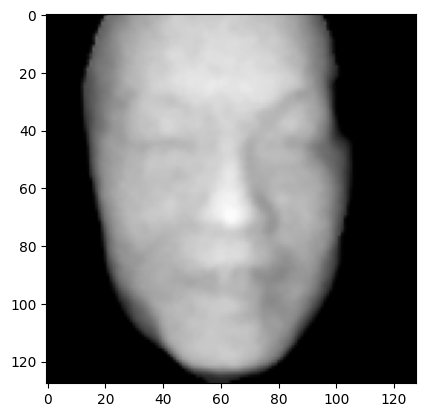

In [67]:
print(files[0])
img = cv.imread(files[0], flags=cv.IMREAD_UNCHANGED)[:, :, 0]
print(img.shape)
plt.imshow(img[:, :, None].repeat(3, axis=2))

In [68]:
path = "./data/lock3dface_num2id.json"
with open(path, 'r') as f:
    num2id = json.load(f)

In [69]:
items = []
save_root_path = "/home/mnt/rz_mnt/depth-face-mae/lock3dface/test_set"
for f in tqdm(files):
    try:
        img_path = f
        img = cv.imread(f, flags=cv.IMREAD_UNCHANGED)[:, :, 0]
        save_dir = os.path.join(save_root_path, f.split("/")[-2])
        if not os.path.exists(save_dir):
            os.makedirs(save_dir)
        save_path = os.path.join(save_dir, f.split("/")[-1])
        cv.imwrite(save_path, img)
    except Exception as e:
        print(f, e)

100%|██████████| 11100/11100 [00:30<00:00, 359.62it/s]


In [ ]:
dataset = {
    "train": [],
    "val": [],
}
path = "/home/mnt/rz_mnt/depth-face-mae/lock3dface/train_set/*/*.png"
files = glob(path)
for f in tqdm(files):
    dir_name = f.split("/")[-2]
    num = int(dir_name[:3])
    label = num2id[num]
    item = {"img_path": f, "label": label, "subset": }

  0%|          | 0/312275 [00:00<?, ?it/s]

143 129


In [44]:
files[0]

'/home/mnt/rz_mnt/depth-face-mae/lock3dface/train_set/143_Kinect_FE_1DEPTH/24_depth_normal.png'

In [22]:
root_path = "/home/czj/BFM2019_large/*/*.png"
dummy_files = glob(root_path)
print(len(dummy_files))

4920000


/home/czj/BFM2019_large/09611/24_yaw_-40_depth_normal.png


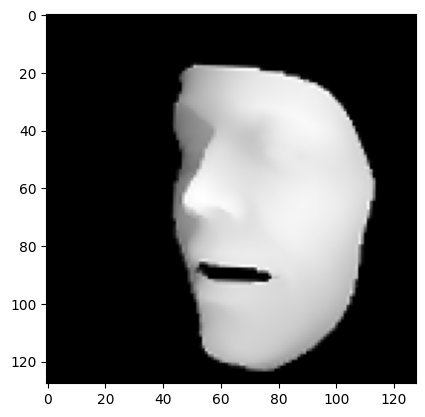

In [26]:
print(dummy_files[0])
img = cv.imread(dummy_files[0], flags=cv.IMREAD_UNCHANGED)
img.shape
plt.imshow(img[:, :, None].repeat(3, axis=2))

In [34]:
path = "./data/lock3dface.json"
with open(path, 'r') as f:
    data = json.load(f)

In [14]:
lock3dface_subsets = {"NU": 0, "FE": 1, "PS": 2, "OC": 3, "TM": 4}
for _, subset in data.items():
    for x in tqdm(subset):
        x["val_subset_label"] = lock3dface_subsets["TM"] if x["is_TM"] else lock3dface_subsets[x["subset"]]

100%|██████████| 11100/11100 [00:00<00:00, 1997887.59it/s]


In [35]:
data["val"][0]

{'img_path': '/home/mnt/rz_mnt/depth-face-mae/lock3dface/test_set/531_Kinect_FE_1DEPTH/21_depth_normal.png',
 'label': 463,
 'subset': 'FE',
 'is_TM': False,
 'val_subset_label': 1}

In [27]:
with open(path, 'w') as f:
    json.dump(data, f)

In [30]:
path = "/home/rz/code/deep-denoising/datafiles/gallery_1028_new.txt"
items = []
with open(path, 'r') as f:
    for line in f:
        items.append(line.strip())

In [39]:
new_items = []
for item in items:
    item = item.replace("/home/rz/data/lock3dface/dataset_1028_new/", "/home/mnt/rz_mnt/depth-face-mae/lock3dface/")
    new_items.append(item)

In [44]:
gallery = []
for item in new_items:
        dir_name = item.split("/")[-2]
        num = int(dir_name[:3])
        label = num2id[num]
        tmp = {"img_path": item, "label": label}
        gallery.append(tmp)

In [51]:
with open("./data/lock3dface.json", 'r') as f:
    data = json.load(f)

In [58]:
data["gallery"] = gallery

In [60]:
data.keys()

dict_keys(['train', 'val', 'gallery'])

In [59]:
with open('./data/lock3dface.json', 'w') as f:
    json.dump(data, f)

In [55]:
with open("./data/lock3dface_num2id.json", 'w') as f:
    json.dump(num2id, f)